# 
Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [104]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.metrics import plot_roc_curve 

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# 
These are the categorical columns in the given dataset

In [5]:
df.shape

(614, 13)

# 
Dataset having 614 rows and 13 columns

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 
The dataset contains integer, object and float type data

In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# 
These are the unique values present in each column

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('************************')

LP002571    1
LP002772    1
LP001478    1
LP001836    1
LP002409    1
           ..
LP002447    1
LP001421    1
LP002379    1
LP002587    1
LP001491    1
Name: Loan_ID, Length: 614, dtype: int64
************************
Male      489
Female    112
Name: Gender, dtype: int64
************************
Yes    398
No     213
Name: Married, dtype: int64
************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
************************
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: Coapplica

# 
The column Loan_ID is the unique ID given to the applicants also it has no significane in the prediction so let's drop this column

In [9]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 
Missing values present in Gender,Married,Dependents -Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History.Will fill them using imputation techniques.

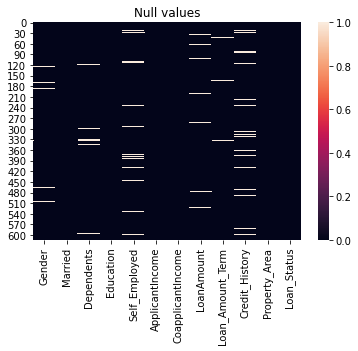

In [11]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

# 
The white lines in the heat map representd the missing values in the data

In [12]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])


df["Married"] = df["Married"].fillna(df["Married"].mode()[0])


df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])


df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])


df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])



df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])

In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

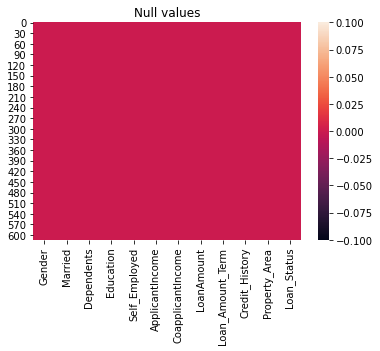

In [14]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [15]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

#  
Yes and NO these are the unique values present in the target column

In [16]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
df.loc[df['Loan_Status']=="  "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


# 
It seems that there are no spaces in the dataset

In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# 
This gives the statistical information of the dataset.

  a). The counts of all the columns are same which means there are no null values present in the dataset.
  
  b). The mean value is greater than the median(50%) in ApplicantIncome, CoapplicantIncome, LoanAmount which means they are       skewed to right.
  
  c).There is a huge difference in max and 75% percentile which means there are outliers present in the dataset.

# EDA

Y    422
N    192
Name: Loan_Status, dtype: int64


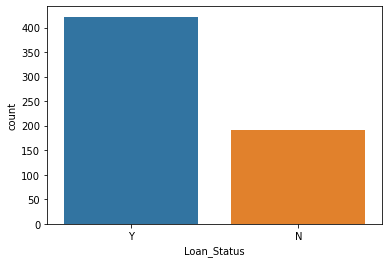

In [19]:
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

# 
From the above graph we can conclude that more number of loan has been approved that is Y=422 and N=192 has got denied

Male      502
Female    112
Name: Gender, dtype: int64


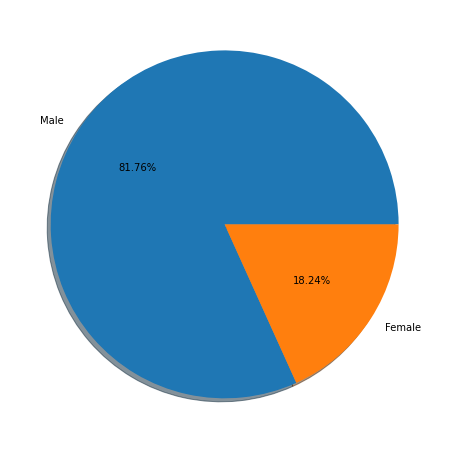

In [20]:
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%',shadow=True)
plt.show()

# 
There are more number of Male applicants applying for loan than Female applicants. There are about 81% of the Male candidates and only 18% of Female candidates are applying for the loan

Yes    401
No     213
Name: Married, dtype: int64


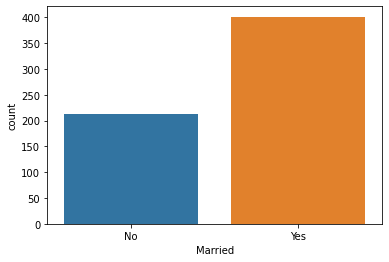

In [21]:
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

# 
The number of Married applicants who are applied for loan is higher than the Unmarried applicants

0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64


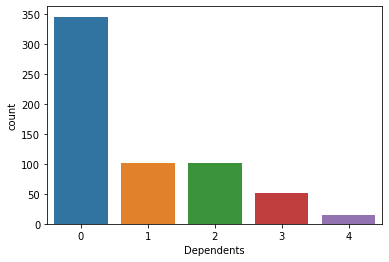

In [69]:
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

# 
The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less

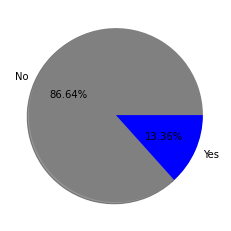

In [23]:
labels='No' ,'Yes'
colors = ["grey", "b"]
fig, ax = plt.subplots()
ax.pie(df['Self_Employed'].value_counts(),labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

# 
Most of the loan applicants are not self employed

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


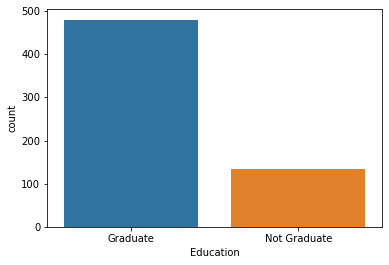

In [24]:
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

# 
More number of people applied for loan are Graduates and few applicants are Not Graduates

1.0    525
0.0     89
Name: Credit_History, dtype: int64


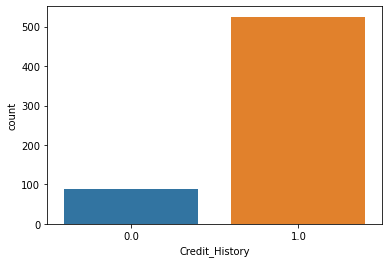

In [25]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

# 
Most of the applicants who have credit history 1 are high in numbers

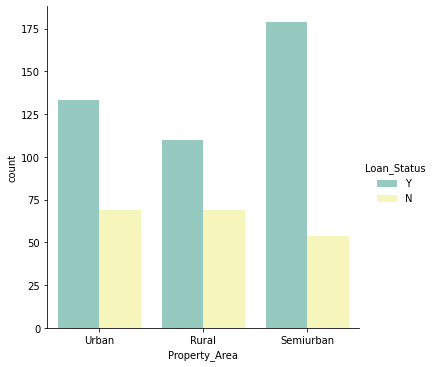

In [26]:
sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status',palette="Set3")
plt.xticks(rotation=0);

# 
Applicants having property in semiurban area has more chance of getting loan approved

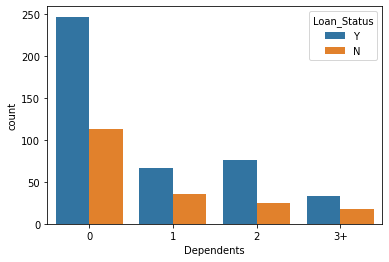

In [27]:
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()            

# 
The count of 0 dependents is high which means most of the applicants have no dependents.The applicants who have dependents 0 are more likely to get their loan approved

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


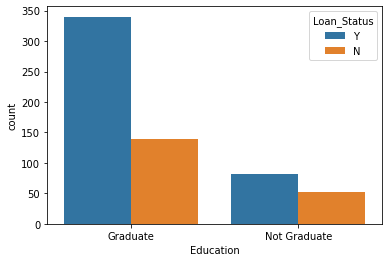

In [28]:
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()  

# 
Most of the applicants who are applying for loan are graduated and only few are not graduated. Also the applicants who are graduated have tendency of getting loans than who are not

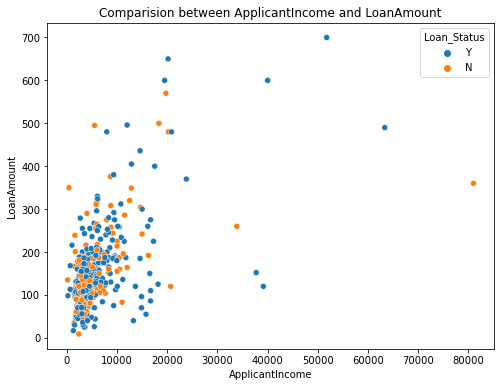

In [29]:
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df["ApplicantIncome"],df["LoanAmount"],hue=df["Loan_Status"]);

# 
There is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300

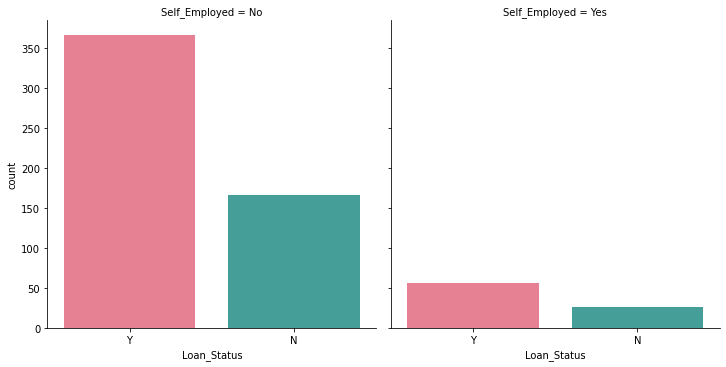

In [30]:
sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count',palette="husl")

# 
Applicants who are not self employed has more chance of getting loan approved

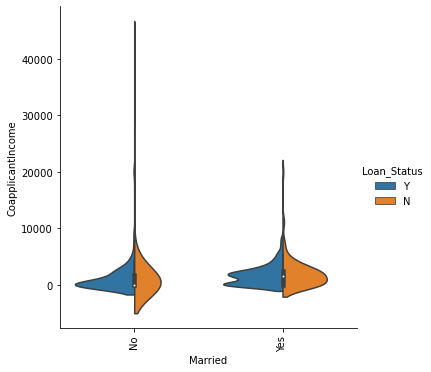

In [31]:
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

# 
Married people has more chance of getting loan approved

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


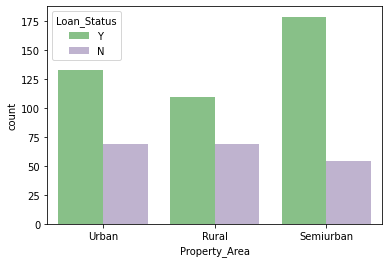

In [32]:
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="Accent")
plt.show()

# 
Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval

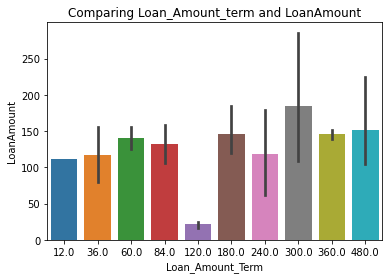

In [33]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

# 
The loan amount term 300.0 is high with loan amount compared to others

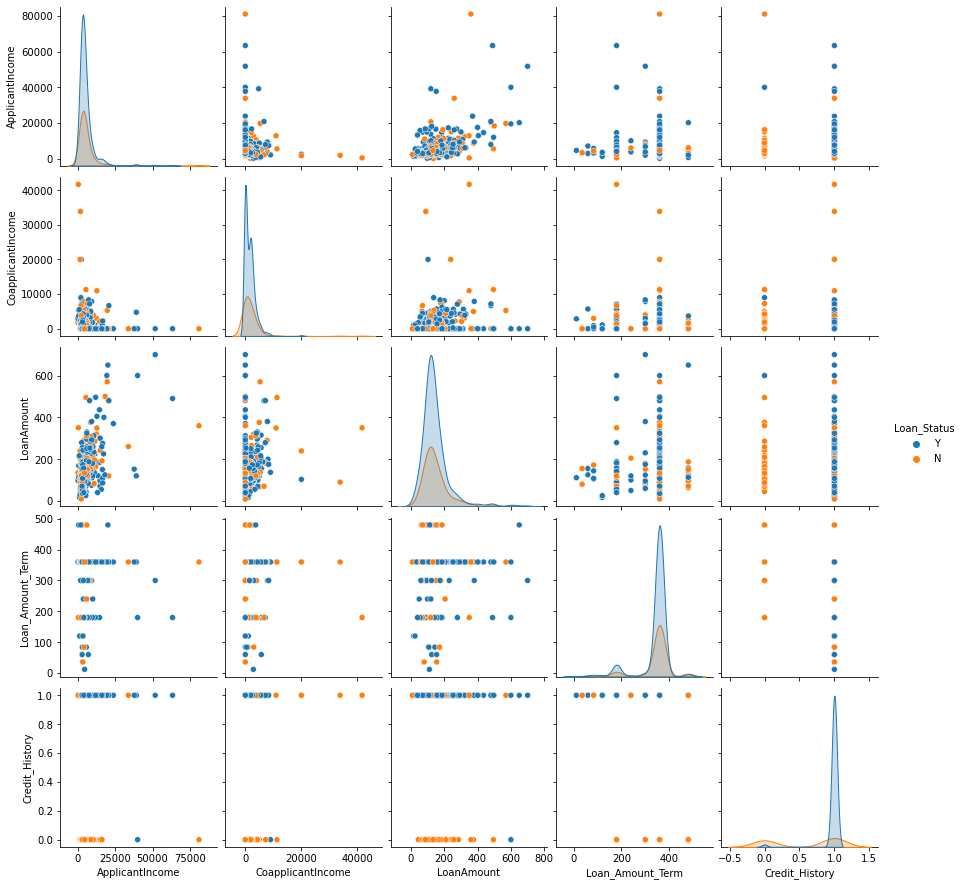

In [34]:
sns.pairplot(df,hue="Loan_Status")

# 
Above is the pair plot for having Laon_Status as target.There are some extreme outliers present in the dataset

In [55]:
df = df.apply(LabelEncoder().fit_transform)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,1,3,0,0,275,0,7,5,1,0,1
611,611,1,1,1,0,0,431,3,162,8,1,2,1
612,612,1,1,2,0,0,422,0,132,8,1,2,1


# 
The categorical columns has been converted into numerical columns by using label encoding

In [56]:
print(df.corr())

                    Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000 -0.007403 -0.018621    0.055139   0.039442   
Gender            -0.007403  1.000000  0.336094    0.149674   0.024382   
Married           -0.018621  0.336094  1.000000    0.338689   0.006759   
Dependents         0.055139  0.149674  0.338689    1.000000   0.060466   
Education          0.039442  0.024382  0.006759    0.060466   1.000000   
Self_Employed      0.005039 -0.025022 -0.038153    0.005622  -0.021130   
ApplicantIncome    0.008771  0.075981  0.017005    0.144363  -0.190873   
CoapplicantIncome -0.030368  0.167229  0.196097   -0.077131  -0.052724   
LoanAmount         0.018645  0.152121  0.178581    0.141360  -0.137432   
Loan_Amount_Term  -0.060161 -0.061180 -0.078732   -0.082453  -0.052948   
Credit_History    -0.015365 -0.018755  0.033224   -0.089960  -0.037534   
Property_Area     -0.155416 -0.030903  0.007973    0.032600  -0.065243   
Loan_Status        0.011773  0.008690 

<function matplotlib.pyplot.show(close=None, block=None)>

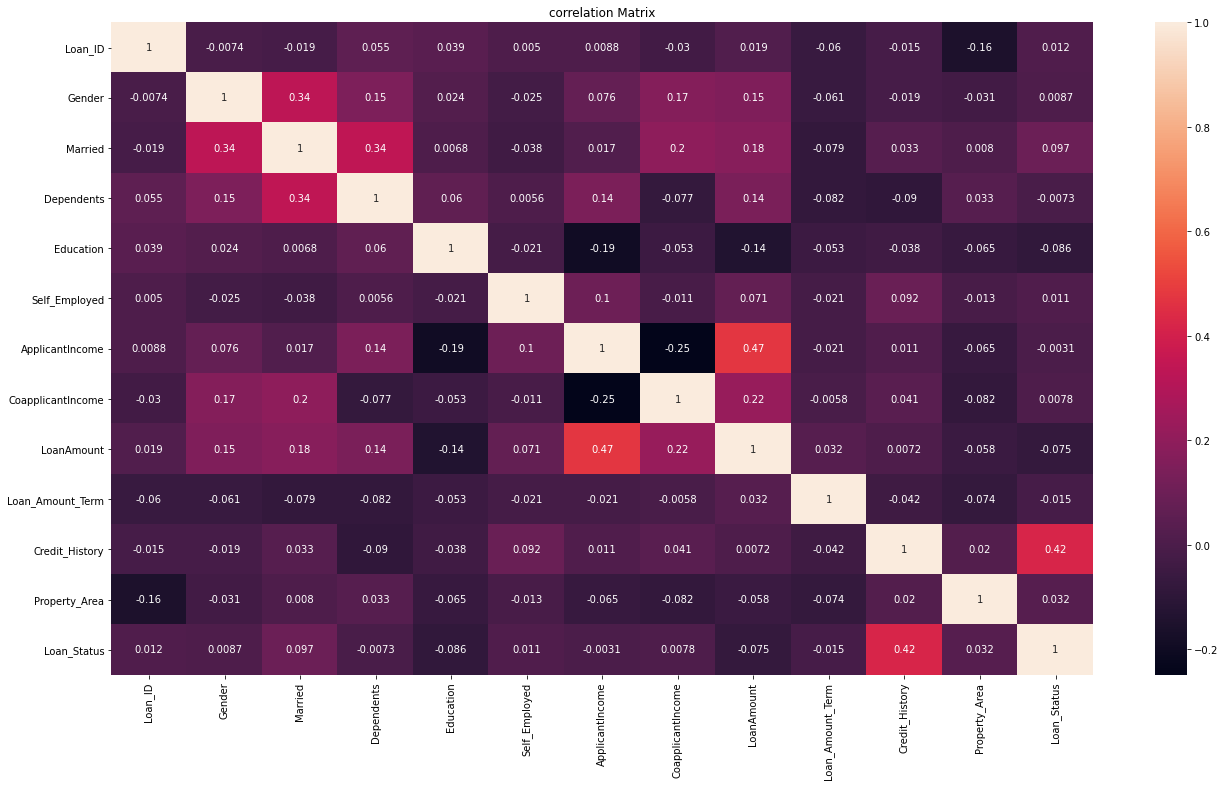

In [57]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

# 
 a).The target column Loan_Status is highly positively correlated with the feature Credit_History.

 b).The other features have very less correlation with the target column.

 c).Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

 d).ApplicantIncome and Gender is very less correlated with the target.
 
 e).Dark shades are highly correlated and light shades are very less correlated.

In [58]:
corr_matrix=df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.423212
Married              0.096657
Property_Area        0.032112
Loan_ID              0.011773
Self_Employed        0.010880
Gender               0.008690
CoapplicantIncome    0.007812
ApplicantIncome     -0.003123
Dependents          -0.007318
Loan_Amount_Term    -0.015239
LoanAmount          -0.074576
Education           -0.085884
Name: Loan_Status, dtype: float64

# 
The target column Loan_Status is highly positively correlated with the feature Credit_History and the other features have very less correlation with the target column.

In [59]:
x=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [60]:
x.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.555688
Loan_Amount_Term    -2.819192
Credit_History      -0.199751
Property_Area       -0.066196
dtype: float64

# 
The skewness present in Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area the above columns

# Removing Skewness

In [61]:
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [134]:
x.skew()

Loan_ID             -0.239649
Gender               0.216833
Married             -0.329455
Dependents           0.401384
Education            1.318356
Self_Employed        1.735838
ApplicantIncome     -0.312083
CoapplicantIncome    0.013606
LoanAmount          -0.108844
Loan_Amount_Term     0.443169
Credit_History       0.094724
Property_Area       -0.149294
dtype: float64

# 
The data is almost normal also we have removed the skewness that we can notice in the above 

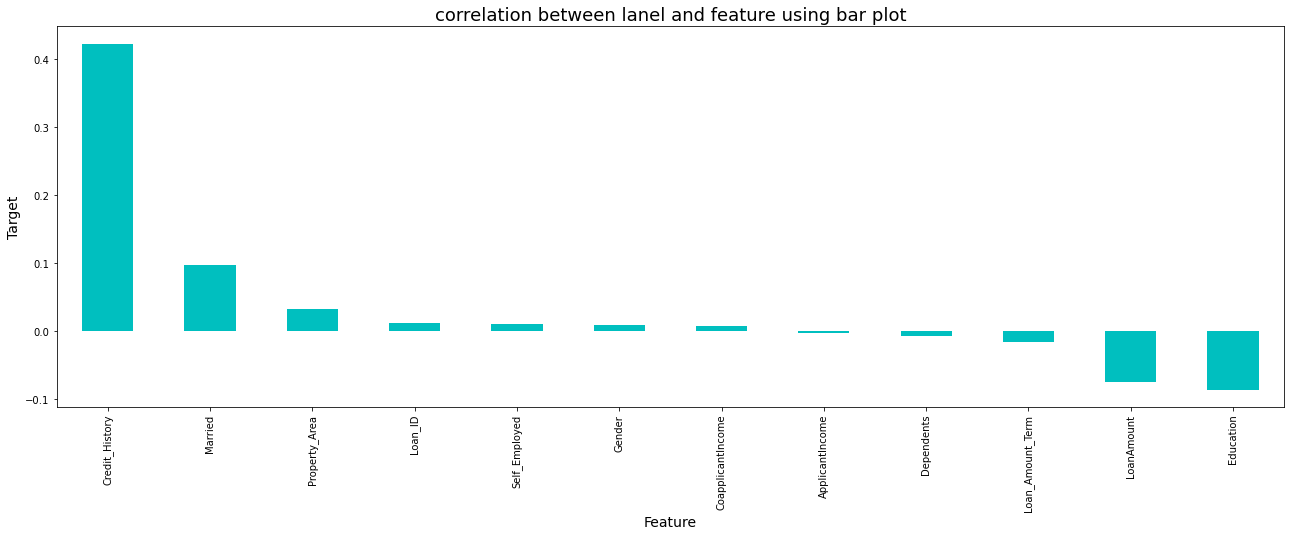

In [63]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

# 
Here the columns ApplicantIncome has very less correlation with the target so we can drop this column if necessary.

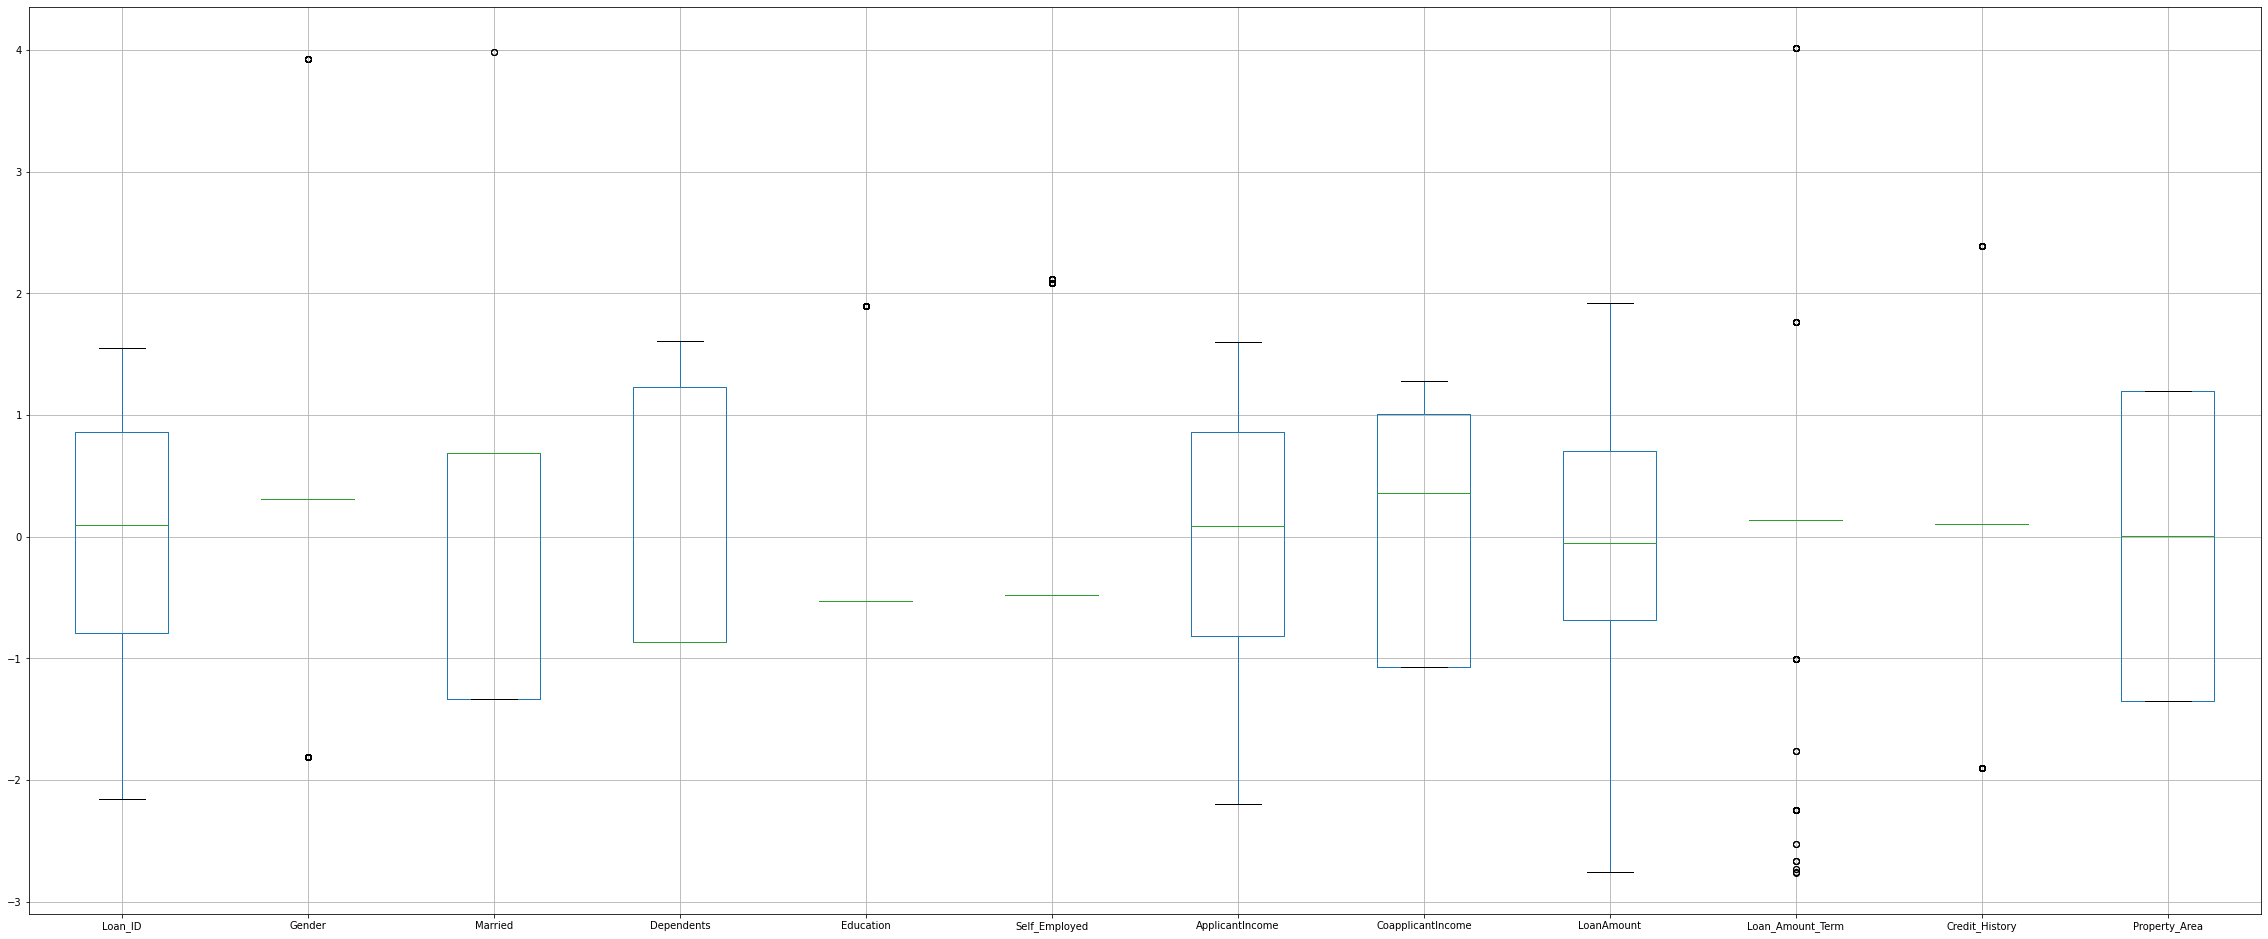

In [64]:
x.iloc[:,0:22].boxplot(figsize=[40,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

# 
Since Credit_History,Loan_Amount_Term is a Categorical column no need to remove outliers.In all other 4 numerical columns i have to remove outliers.

In [136]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114, 133,
        158, 170, 218, 231, 236, 242, 262, 268, 295, 313, 333, 336, 344,
        374, 380, 385, 411, 432, 447, 463, 468, 495, 497, 535, 542, 546,
        575, 579, 585, 600, 601], dtype=int64),
 array([5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 9, 9, 5, 5,
        9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 5, 5, 9, 9, 5, 9, 5, 5],
       dtype=int64))

In [137]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,1,3,0,0,275,0,7,5,1,0,1
611,611,1,1,1,0,0,431,3,162,8,1,2,1
612,612,1,1,2,0,0,422,0,132,8,1,2,1


# 
This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3. 

In [67]:
df_new_z.shape

(570, 13)

In [68]:
data_loss = (614-602)/614*100
data_loss

1.9543973941368076

# 
Using Zscore i have 1.95439% data loss.Which is less than 10%

In [70]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# 
Here we can notice the class imbalancing issue so lets use SMOTE to balance the data

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [73]:
y.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

# 
The data is balanced now, Since the highest count of the target is 422 so the data is balanced by oversampling all the classes to the count 422.

In [75]:
df_new_z.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [79]:
maxAccu=0
maxRS=0
for i in range(0,21):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)  

Best accuracy is 0.7751479289940828 on Random_state 5


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 5)

# 
We have created a new train test split using Random State

In [113]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 77.51479289940828
[[54 25]
 [13 77]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        79
           1       0.75      0.86      0.80        90

    accuracy                           0.78       169
   macro avg       0.78      0.77      0.77       169
weighted avg       0.78      0.78      0.77       169



# 
The accuracy using Logistic Regression Classifier is 77.518%

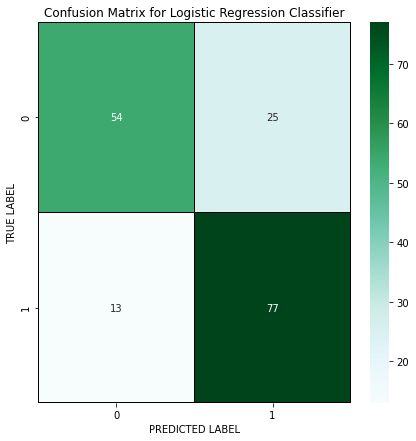

In [114]:
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


In [115]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 76.33136094674556
[[64 15]
 [25 65]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        79
           1       0.81      0.72      0.76        90

    accuracy                           0.76       169
   macro avg       0.77      0.77      0.76       169
weighted avg       0.77      0.76      0.76       169



# 
The accuracy by using Decision Tree Classifier is 76.33%

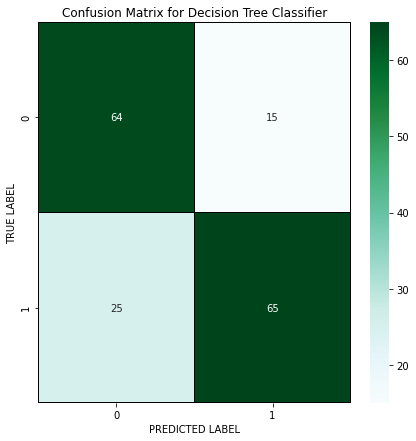

In [116]:
cm = confusion_matrix(y_test,preddt)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [117]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 88.16568047337277
[[67 12]
 [ 8 82]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        79
           1       0.87      0.91      0.89        90

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



# 
The accuracy by using Random Forest Classifier is 88.16

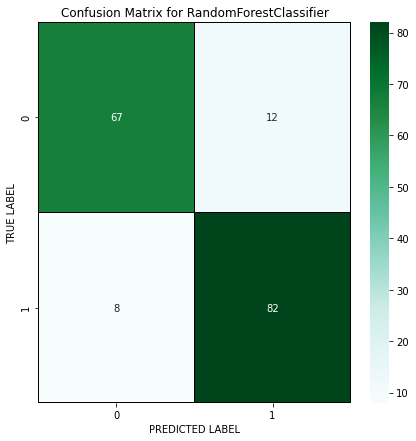

In [118]:
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [120]:
svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 79.28994082840237
[[60 19]
 [16 74]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        79
           1       0.80      0.82      0.81        90

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



# 
The accuracy using SVC is 79.28%

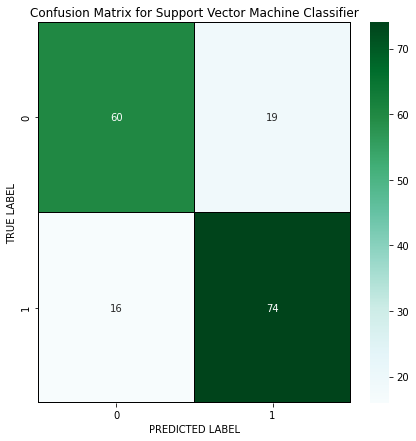

In [121]:
cm = confusion_matrix(y_test,ad_pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [122]:
scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.6089673147365454


In [123]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random Forest model :",scr.mean())

cross validation score of Random Forest model : 0.5461256692025923


In [124]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model :",scr.mean())

cross validation score of SVC model : 0.6906875176105945


In [125]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini' , 'entropy']}

In [126]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [127]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=39, max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

72.7810650887574


In [128]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.893491124260355

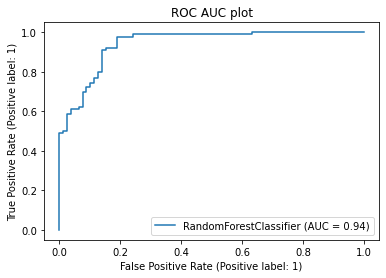

In [129]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# 
This is the AUC-ROC curve for the models taht we have used and is plotted False positive rate against True positive rate.

In [130]:
import joblib 
joblib.dump(GCV.best_estimator_,"Loan_application_prediction.pkl")

['Loan_application_prediction.pkl']

In [131]:
model=joblib.load("Loan_application_prediction.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [132]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
164,0,0
165,0,0
166,1,1
167,1,1


#
We can observe both original and predicted values are same. That means the loan approval status for both predicted and original are same